# Telstra Network Disruptions 


** The goal of the problem is to predict Telstra network's fault severity at a time at a particular location based on the log data available. Using a dataset of features from their service logs, task is predicting if a disruption is a momentary glitch or a total interruption of connectivity **


##  Data Preperation

##  Import Modules and Datasets

In [188]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline

dftest = pd.read_csv("fault/test.csv")
df = pd.read_csv("fault/train.csv")
df2=pd.read_csv("fault/event_type.csv")
df3= pd.read_csv("fault/resource_type.csv")
df4=pd.read_csv("fault/severity_type.csv")
df5=pd.read_csv("fault/log_feature.csv")
dfArray=np.array([df2,df3,df4,df5])
dfArray[0].head()


,id,event_type
0,6597,event_type 11
1,8011,event_type 15
2,2597,event_type 15
3,5022,event_type 15
4,5022,event_type 11


## Data Preprocessing :  Data merging to create a Customer Analytical Record(CAR)
#### Merge all dataframes having 'id' as the key excluding dataframe created from train dataset

In [189]:
count = 0
for array in dfArray:
    count+=1
    if count==1:
       temp=array
    else:
       temp = temp.merge(array, on='id', how='inner', suffixes=('_1', '_2'))
temp.head()    

,id,event_type,resource_type,severity_type,log_feature,volume
0,6597,event_type 11,resource_type 8,severity_type 2,feature 68,6
1,8011,event_type 15,resource_type 8,severity_type 2,feature 68,7
2,2597,event_type 15,resource_type 8,severity_type 2,feature 68,1
3,5022,event_type 15,resource_type 8,severity_type 1,feature 172,2
4,5022,event_type 15,resource_type 8,severity_type 1,feature 56,1


## Data cleansing to remove text from variables

In [190]:
#Method1 to Remove text from variables
#better method with apply
def cleanse(str,keyword):
    if keyword in str:
        return str.replace(keyword,"")

In [191]:
#Method2 to Remove text from variables
def stripOffText(str):
    if 'severity_type_' in str:
        return str.replace('severity_type_',"")
    if 'resource_type_' in str:
        return str.replace('resource_type_',"")
    if 'event_type_' in str:
        return str.replace('event_type_',"")
    if 'log_feature_' in str:
        return str.replace('log_feature_',"")
    

In [192]:
#Remove text from variables
temp['severity_type'] = temp.apply(lambda row: cleanse(row['severity_type'], 'severity_type'), axis=1)
temp['resource_type'] = temp.apply(lambda row: cleanse(row['resource_type'], 'resource_type'), axis=1)
temp['event_type'] = temp.apply(lambda row: cleanse(row['event_type'], 'event_type'), axis=1)
temp['log_feature'] = temp.apply(lambda row: cleanse(row['log_feature'], 'feature'), axis=1)
temp.head()


,id,event_type,resource_type,severity_type,log_feature,volume
0,6597,11,8,2,68,6
1,8011,15,8,2,68,7
2,2597,15,8,2,68,1
3,5022,15,8,1,172,2
4,5022,15,8,1,56,1


In [193]:
temp1=df
temp2=dftest
#cleanse temp1 train data frame
temp1['location'] = temp1.apply(lambda row: cleanse(row['location'], 'location'), axis=1)
temp2['location'] = temp2.apply(lambda row: cleanse(row['location'], 'location'), axis=1)
#Merge train and test dataframes with combined data frame 'temp'
result_df = temp1.merge(temp, on='id', how='inner', suffixes=('_1', '_2'))
result_df_test= temp2.merge(temp, on='id', how='inner', suffixes=('_1', '_2'))


## Convert categorical data columns datatypes to integers

In [194]:

# Convert to categorical data columns by converting datatypes of columns to integers
result_df['event_type'] = result_df['event_type'].astype(int)
result_df['severity_type'] = result_df['severity_type'].astype(int)
result_df['resource_type'] = result_df['resource_type'].astype(int)
result_df['log_feature'] = result_df['log_feature'].astype(int)
result_df['location'] = result_df['location'].astype(int)
result_df.info()

#Repeat for test

result_df_test['event_type'] = result_df_test['event_type'].astype(int)
result_df_test['severity_type'] = result_df_test['severity_type'].astype(int)
result_df_test['resource_type'] = result_df_test['resource_type'].astype(int)
result_df_test['log_feature'] = result_df_test['log_feature'].astype(int)
result_df_test['location'] = result_df_test['location'].astype(int)
result_df_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 61839 entries, 0 to 61838
Data columns (total 8 columns):
id                61839 non-null int64
location          61839 non-null int32
fault_severity    61839 non-null int64
event_type        61839 non-null int32
resource_type     61839 non-null int32
severity_type     61839 non-null int32
log_feature       61839 non-null int32
volume            61839 non-null int64
dtypes: int32(5), int64(3)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 84584 entries, 0 to 84583
Data columns (total 7 columns):
id               84584 non-null int64
location         84584 non-null int32
event_type       84584 non-null int32
resource_type    84584 non-null int32
severity_type    84584 non-null int32
log_feature      84584 non-null int32
volume           84584 non-null int64
dtypes: int32(5), int64(2)
memory usage: 3.5 MB


# Exploratory Data Analysis

**Chi-square test is performed to understand correlation between categorical variables
Below analysis shows location and id are strongly correlated and we can drop one of them
Spearman corr test is performed to understand correlation between categorical vs numericals**


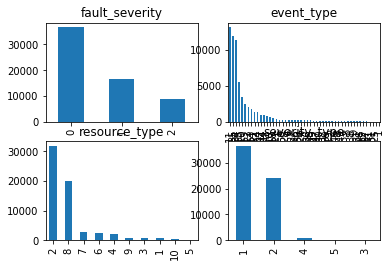

In [195]:
#Plot feature vs frequency
fig = plt.figure()
fig11 = fig.add_subplot(221)
fig11=result_df['fault_severity'].value_counts().plot(kind = 'bar',title="fault_severity")
fig12 = fig.add_subplot(222)
fig12=result_df['event_type'].value_counts().plot(kind = 'bar',title="event_type")
fig21 = fig.add_subplot(223)
fig21=result_df['resource_type'].value_counts().plot(kind = 'bar',title="resource_type")
fig22 = fig.add_subplot(224)
fig22=result_df['severity_type'].value_counts().plot(kind = 'bar',title="severity_type")


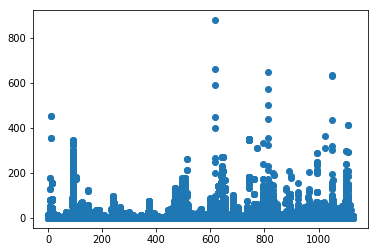

In [196]:
#Check for outliers
plt.scatter(result_df['location'],result_df['volume'])
#result_df=result_df[result_df['volume']<400]


## chi-square test of independence

In [197]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# Select two features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=2)
X_kbest = chi2_selector.fit_transform(result_df,result_df['fault_severity'])
type(X_kbest)

# Show results
print('Original number of features:', result_df.shape[1])
print('Reduced number of features:', X_kbest.shape[1])
X_kbest


Original number of features: 8
Reduced number of features: 2


array([[14121,   118],
       [14121,   118],
       [14121,   118],
       ..., 
       [17067,   885],
       [17067,   885],
       [17067,   885]], dtype=int64)

## Spearman corr for numerical vs categorical

In [198]:
#location event_type ,resource_type and severity_type and log_feature are related
result_df.corr(method='spearman')


,id,location,fault_severity,event_type,resource_type,severity_type,log_feature,volume
id,1.000000,-0.027298,-0.035930,0.019441,-0.013694,0.027083,-0.010111,-0.002106
location,-0.027298,1.000000,0.271742,-0.383049,0.429917,-0.424742,-0.304589,0.071210
fault_severity,-0.035930,0.271742,1.000000,-0.261497,0.290473,-0.360594,-0.238632,-0.046634
event_type,0.019441,-0.383049,-0.261497,1.000000,-0.596874,0.414419,0.523528,0.091495
resource_type,-0.013694,0.429917,0.290473,-0.596874,1.000000,-0.392140,-0.491933,-0.043653
severity_type,0.027083,-0.424742,-0.360594,0.414419,-0.392140,1.000000,0.382624,0.126415
log_feature,-0.010111,-0.304589,-0.238632,0.523528,-0.491933,0.382624,1.000000,0.043322
volume,-0.002106,0.071210,-0.046634,0.091495,-0.043653,0.126415,0.043322,1.000000


In [199]:
#Check for missing columns and rows
result_df.isnull().sum()
result_df.head()

,id,location,fault_severity,event_type,resource_type,severity_type,log_feature,volume
0,14121,118,1,34,2,2,312,19
1,14121,118,1,34,2,2,232,19
2,14121,118,1,35,2,2,312,19
3,14121,118,1,35,2,2,232,19
4,9320,91,0,34,2,2,315,200


In [200]:
#Combine the train and test provided by kaggle before dumifying
result_df_combined= pd.concat([result_df,result_df_test])


## Convert Categoricals using Get_Dummies

In [201]:
#Dumify all the categorical data columns..
df_combined_with_dummies = pd.get_dummies( result_df_combined, columns = ['location','resource_type','event_type','severity_type','log_feature'],drop_first=True )
df_combined_with_dummies.head()



,fault_severity,id,volume,location_2,location_3,location_4,location_5,location_6,location_7,location_8,...,log_feature_377,log_feature_378,log_feature_379,log_feature_380,log_feature_381,log_feature_382,log_feature_383,log_feature_384,log_feature_385,log_feature_386
0,1.0,14121,19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,14121,19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,14121,19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,14121,19,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,9320,200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [202]:
#Split to obtain test dataset provided by kaggle
df_with_dummies_test = df_combined_with_dummies[df_combined_with_dummies['fault_severity'].isnull()]
df_with_dummies = df_combined_with_dummies[df_combined_with_dummies['fault_severity'].notnull()]
df_with_dummies.shape


(61839, 1578)

In [203]:
#Get list of all column_names
li=list(df_with_dummies.columns.values)
li_test=list(df_with_dummies_test.columns.values)
print("len of train set: "+str(len(li)))
print("len of test set: " +str(len(li_test)))


len of train set: 1578
len of test set: 1578


## Perform Groupby “id” with aggregation function sum

In [204]:
df_grouped=pd.DataFrame(df_with_dummies.groupby(['id'],as_index=False,sort=False)[li[2:]].max(),dtype=int)

df_grouped_test=pd.DataFrame(df_with_dummies_test.groupby(['id'],as_index=False,sort=False)[li_test[2:]].max(),dtype=int)



### Implementation: Shuffle and Split Data for slightly imbalanced Data
Next implementation requires to split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, I implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 70% training and 30% testing.
  - Set the `random_state` for `train_test_split` to a value of my choice. This ensures results are consistent.
-   Since the dataset is slightly imbalanced across class labels 0,1,2. I choose
	stratify parameter.In this context, stratification means that the train_test_split method returns training and         test subsets that have the same proportions of class labels as the input dataset.

In [205]:
from sklearn.model_selection import train_test_split
target=df['fault_severity']
X_train, X_test, y_train, y_test = train_test_split(df_grouped, target, test_size=0.30,random_state = 292,shuffle=True,stratify=target)
X_train.head()

,id,volume,location_2,location_3,location_4,location_5,location_6,location_7,location_8,location_9,...,log_feature_377,log_feature_378,log_feature_379,log_feature_380,log_feature_381,log_feature_382,log_feature_383,log_feature_384,log_feature_385,log_feature_386
33,11810,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6525,1729,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2162,12393,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4842,10972,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
775,10675,25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [207]:
X_train.shape

(5166, 1577)

In [208]:
#X_test=df_grouped_test
X_test.shape

(2215, 1577)

### Metrics for evaluation
It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. But this is a multi-class classification problem where model's ability to precisely predict fault severity at a location is *more important* than the model's ability to **recall** those locations. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).





In [209]:
# Import two metrics from sklearn - fbeta_score and accuracy_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from time import time

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner.fit(X_train,y_train)
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end-start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,average='macro',beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,average='macro',beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

## Implementation: Initial Model Evaluation

In the code cell, we implement the following:
- Import the three supervised learning models we have discussed in the capstone proposal.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.





In [210]:
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches

def evaluate(results, accuracy, f1):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = pl.subplots(2, 3, figsize = (11,7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    
    # Add horizontal lines for naive predictors
    ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    pl.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    pl.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    pl.tight_layout()
    pl.show()

GaussianNB trained on 51 samples.
GaussianNB trained on 516 samples.
GaussianNB trained on 5166 samples.
AdaBoostClassifier trained on 51 samples.
AdaBoostClassifier trained on 516 samples.
AdaBoostClassifier trained on 5166 samples.
GradientBoostingClassifier trained on 51 samples.
GradientBoostingClassifier trained on 516 samples.
GradientBoostingClassifier trained on 5166 samples.


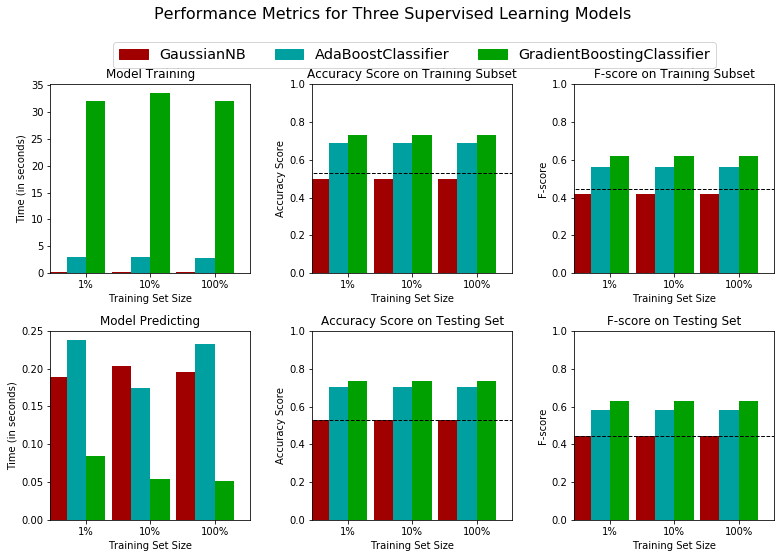

In [211]:
# TODO: Import the three supervised learning models from sklearn
# Import supplementary visualization code visuals.py
import visuals as vs
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
# TODO: Initialize the three models
clf_A = GaussianNB(priors=None)
clf_B = AdaBoostClassifier(random_state=42)
clf_C = GradientBoostingClassifier(random_state=42)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(0.1*samples_100)
samples_1 = int(0.01*samples_100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
accuracy= accuracy_score(y_test, clf_A.predict(X_test))
fscore = fbeta_score(y_test, clf_A.predict(X_test),average='macro' ,beta = 0.5)
evaluate(results, accuracy, fscore)        


## **Benchmark Model Selection **

3 supervised learning models I have evaluated are GaussianNB,AdaBoost,GradientBoosting Classifiers for this usecase.
Among Ensemble Methods, we have chosen Gradient Boosting Classifier as benchmark model because of its better performance and F-score.


## **Utilize GridSearchCV technique to obtain best fit classifier**

In [212]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
# TODO: Initialize the classifier
clf = GradientBoostingClassifier(random_state=42,n_estimators=10)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'max_depth':[2,4,6],'min_samples_leaf':[2,4,6], 'min_samples_split':[2,4,6]}
#parameters = {'max_depth':[3,6],'min_samples_leaf':[1,2], 'min_samples_split':[2]}


# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score,average='macro',beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, average='macro',beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions,average='macro', beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.7133
F-score on testing data: 0.5864

Optimized Model
------
Final accuracy score on the testing data: 0.7233
Final F-score on the testing data: 0.6018


In [213]:
classifier_score = clf.score(X_test, best_predictions)
print("SignalSeverityModel accuracy score is:",classifier_score)

SignalSeverityModel accuracy score is: 0.925056433409


### Evaluation Metrics :Precision-Recall metrics for classification problem

In [214]:
from sklearn.metrics import classification_report
y_true = df['fault_severity']
y_pred=best_clf.predict(df_grouped)
target_names = ['fault_severity_0', 'fault_severity_1', 'fault_severity_2']
print(classification_report(y_true, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

fault_severity_0       0.76      0.95      0.84      4784
fault_severity_1       0.66      0.32      0.43      1871
fault_severity_2       0.67      0.48      0.56       726

     avg / total       0.73      0.74      0.71      7381



###  Predicted Probabilities for Classes 1,2,3

In [215]:
probas = best_clf.predict_proba(df_grouped_test)
idList= df_grouped_test['id']
probas

array([[ 0.81056011,  0.100919  ,  0.08852088],
       [ 0.53354256,  0.14524142,  0.32121602],
       [ 0.81341046,  0.09775738,  0.08883217],
       ..., 
       [ 0.36398577,  0.51849972,  0.11751451],
       [ 0.75923456,  0.14851727,  0.09224817],
       [ 0.63141392,  0.26778764,  0.10079843]])

### Generate Output excel having with location,probabilities,y_pred

In [216]:
#Create a new dataframe with location,probabilities,y_pred
arr=[idList,probas[:,0],probas[:,1],probas[:,2]]
arr=np.array(arr)
cols = ['id','predict_0','predict_1','predict_2']
df_final = pd.DataFrame(arr.T,columns=cols)
df_final.to_csv('output.csv', sep=',', encoding='utf-8')